# Ada Boost 
### Jay Bhsnushali (60009200047)

In [ ]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 9
%matplotlib inline

In [ ]:
from google.colab import drive

In [ ]:
# IMPORTING SKLEARN MODULES
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

# ***IMPLEMENTING ADA BOOST***

## **SYNTHETIC DATASET**

In [ ]:
# GENERATING RANDOM DATASET

from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=6)

# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
Y = [i for i in y]
print(Y)

[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 

In [ ]:
print(X)
print(Y)

[[-1.24114616 -0.67356821  0.73485685 ... -0.35256636  1.16709059
  -1.10252623]
 [-0.95533222 -1.15425407 -0.83233725 ...  1.3331286  -0.70451889
   3.04691034]
 [ 0.09709762 -1.01573919  0.08181026 ...  2.72850989 -1.35583615
   6.05992645]
 ...
 [ 0.97630766  1.13291003  0.83734826 ...  0.75696879  0.02342233
   2.60888096]
 [ 0.02611694 -0.01855127  1.70899085 ...  0.09998622  0.81880891
  -3.66717247]
 [ 0.06462962  0.29776613  1.80905133 ...  0.68727406 -0.47442881
   1.60838819]]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

### *IMPLEMENTING DECISION TREE CLASSIFIER USING K FOLD CROSS VALIDATION*

In [ ]:
# BUILDING DECISION TREE
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [ ]:
# EVALUTING THE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(DT, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# REPORT PERFORMANCE
print('ACCURACY ON DECISION TREE CLASSFIER: %.3f, WITH STD OF: %.3f' % (np.mean(n_scores), np.std(n_scores)))

ACCURACY ON DECISION TREE CLASSFIER: 0.832, WITH STD OF: 0.033


TESTING OUR MODEL FOR A SINGLE RANDOM DATA SAMPLE

In [ ]:
print("SELECTED ROW\n",X[666])

SELECTED ROW
 [-1.45446733  1.25165648 -0.04509664  0.36558833  0.79462153  1.31389635
  0.0732102   0.59868923 -1.2404878  -2.08310779 -2.21118707  2.07831885
  2.88999476 -0.5846161   0.3772644  -0.26633127  1.33506343  2.51963378
  1.81238086 -6.28804848]


In [ ]:
DT.fit(X, Y)

# MAKING A SINGLE PREDICTION
row = [X[666]]
y_pred = DT.predict(row)

print("ORIGINAL CLASS:",Y[666])
print('\nPREDICTED CLASS: %d' % y_pred[0])

ORIGINAL CLASS: 1

PREDICTED CLASS: 1


### *IMPLEMENTING LOGISTIC REGRESSION USING K FOLD CROSS VALIDATION*

In [ ]:
# BUILDING LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
# EVALUTING THE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(LR, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# REPORT PERFORMANCE
print('ACCURACY ON LOGISTIC REGRESSION CLASSFIER: %.3f, WITH STD OF: %.3f' % (np.mean(n_scores), np.std(n_scores)))

ACCURACY ON LOGISTIC REGRESSION CLASSFIER: 0.843, WITH STD OF: 0.031


TESTING OUR MODEL FOR A SINGLE RANDOM DATA SAMPLE

In [ ]:
print("SELECTED ROW\n",X[333])

SELECTED ROW
 [-0.97492686  0.69566541  1.19043088 -0.78394621  1.83325369  0.45780383
 -0.6159796  -0.40077038 -0.16297329 -1.69409187 -2.4886214  -2.39097041
 -1.9984958  -2.55760461  0.87849111 -0.80462584 -0.75011846 -0.53524151
  0.07847968 -2.64503222]


In [ ]:
LR.fit(X, Y)

# MAKING A SINGLE PREDICTION
row = [X[333]]
y_pred = LR.predict(row)

print("ORIGINAL CLASS:",Y[333])
print('\nPREDICTED CLASS: %d' % y_pred[0])

ORIGINAL CLASS: 1

PREDICTED CLASS: 1


### *IMPLEMENTING ADABOOST WITH LOGISTIC REGRESSION AS BASE ESTIMATOR*

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
# DEFINING THE MODEL
model = AdaBoostClassifier(base_estimator=LR)

In [ ]:
# EVALUTING THE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# REPORT PERFORMANCE
print('ACCURACY ON ADABOOST MODEL WITH LOGISTIC REGRESSION AS BASE ESTIMATOR: %.3f, WITH STD OF: %.3f' % (np.mean(n_scores), np.std(n_scores)))

ACCURACY ON ADABOOST MODEL WITH LOGISTIC REGRESSION AS BASE ESTIMATOR: 0.842, WITH STD OF: 0.035


TESTING OUR MODEL FOR A SINGLE RANDOM DATA SAMPLE

In [ ]:
print("SELECTED ROW\n",X[333])

SELECTED ROW
 [-0.97492686  0.69566541  1.19043088 -0.78394621  1.83325369  0.45780383
 -0.6159796  -0.40077038 -0.16297329 -1.69409187 -2.4886214  -2.39097041
 -1.9984958  -2.55760461  0.87849111 -0.80462584 -0.75011846 -0.53524151
  0.07847968 -2.64503222]


In [ ]:
model.fit(X, Y)

# MAKING A SINGLE PREDICTION
row = [X[333]]
y_pred = model.predict(row)

print("ORIGINAL CLASS:",Y[333])
print('\nPREDICTED CLASS: %d' % y_pred[0])

ORIGINAL CLASS: 1

PREDICTED CLASS: 1


### *IMPLEMENTING ADABOOST WITH DECISION TREE AS BASE ESTIMATOR*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [ ]:
# DEFINING THE MODEL
model = AdaBoostClassifier(base_estimator=DT)

In [ ]:
# EVALUTING THE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# REPORT PERFORMANCE
print('ACCURACY ON ADABOOST MODEL WITH DECISION TREE CLASSIFIER AS BASE ESTIMATOR: %.3f, WITH STD OF: %.3f' % (np.mean(n_scores), np.std(n_scores)))

ACCURACY ON ADABOOST MODEL WITH DECISION TREE CLASSIFIER AS BASE ESTIMATOR: 0.833, WITH STD OF: 0.031


TESTING OUR MODEL FOR A SINGLE RANDOM DATA SAMPLE

In [ ]:
print("SELECTED ROW\n",X[666])

SELECTED ROW
 [-1.45446733  1.25165648 -0.04509664  0.36558833  0.79462153  1.31389635
  0.0732102   0.59868923 -1.2404878  -2.08310779 -2.21118707  2.07831885
  2.88999476 -0.5846161   0.3772644  -0.26633127  1.33506343  2.51963378
  1.81238086 -6.28804848]


In [ ]:
model.fit(X, Y)

# MAKING A SINGLE PREDICTION
row = [X[666]]
y_pred = model.predict(row)

print("ORIGINAL CLASS:",Y[666])
print('\nPREDICTED CLASS: %d' % y_pred[0])

ORIGINAL CLASS: 1

PREDICTED CLASS: 1


## **CREDIT CARD DATASET**

In [ ]:
# LOADING THE DATA SET
path = '/content/drive/MyDrive/Colab Notebooks/ML/creditcard.csv'
data = pd.read_csv(path)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


CHECKING IF THERE IS CLASS IMBALANCE PROBLEM

In [ ]:
data['Class'].value_counts()
# 0 -> NO FRAUD
# 1 -> FRAUD

0    284315
1       492
Name: Class, dtype: int64

AS WE CAN CLEARLY SEE THAT THERE IS HUGE DIFFERENCE BETWEEN THE LABEL CLASS.

284315 NON-FRADULENT TRANSACTION AND 492 FRADULENT.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


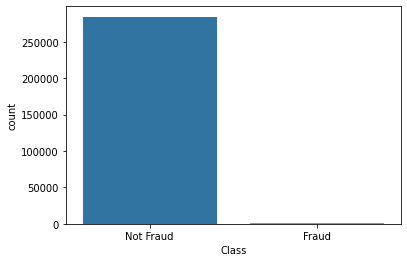

In [ ]:
# VISUALIZING THE LABEL TO CHECK IMBALANCE
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

THUS, THERE IS A CLASS IMBALANCE PROBLEM

**DROPPING NULL VALUES, IF PRESENT**

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

THERE IS NO NULL VALUES

**GETTING OUR FEATURES AND LABELS**

In [ ]:
X = data.iloc[:, :-1].values  #FEATURES
Y = data.iloc[:, -1].values.reshape(-1,1)   #LABEL

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

In [ ]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807, 1)


### *IMPLEMENTING DECISION TREE CLASSIFIER USING K FOLD CROSS VALIDATION*

In [ ]:
# BUILDING DECISION TREE
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [ ]:
# EVALUTING THE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(DT, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# REPORT PERFORMANCE
print('ACCURACY ON DECISION TREE CLASSFIER: %.3f, WITH STD OF: %.3f' % (np.mean(n_scores), np.std(n_scores)))

ACCURACY ON DECISION TREE CLASSFIER: 0.999, WITH STD OF: 0.000


**TESTING OUR MODEL FOR A SINGLE RANDOM DATA SAMPLE**

In [ ]:
print("SELECTED ROW\n",X[666])

SELECTED ROW
 [ 5.03000000e+02  7.47375945e-02 -3.03200885e+00 -4.29919190e-01
 -4.42721155e-01 -1.78471046e+00 -6.66682907e-02  9.87355744e-02
 -2.22524968e-01 -2.41857519e-01  1.58663893e-01 -1.53929167e+00
 -4.96466541e-01  6.64942763e-02 -9.42487144e-02  5.95002324e-01
 -1.03290063e+00 -7.72876626e-02  1.31801278e+00 -3.90927193e-01
  9.67868661e-01 -7.89272087e-02 -1.24724171e+00 -6.20401753e-01
 -3.68544849e-01 -7.33586127e-02  1.29683482e+00 -1.92759681e-01
  1.21440265e-01  7.12820000e+02]


In [ ]:
DT.fit(X, Y)

# MAKING A SINGLE PREDICTION
row = [X[666]]
y_pred = DT.predict(row)

print("ORIGINAL CLASS:",Y[666])
print('\nPREDICTED CLASS: %d' % y_pred[0])

ORIGINAL CLASS: [0]

PREDICTED CLASS: 0


### *IMPLEMENTING ADABOOST CLASSIFIER USING K FOLD CROSS VALIDATION*

In [ ]:
# DEFINING THE MODEL
model = AdaBoostClassifier()

In [ ]:
# EVALUTING THE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

KeyboardInterrupt: ignored

In [ ]:
# REPORT PERFORMANCE
print('ACCURACY ON ADABOOST MODEL: %.3f, WITH STD OF: %.3f' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
print("SELECTED ROW\n",X[666])

In [ ]:
model.fit(X, Y)

# MAKING A SINGLE PREDICTION
row = [X[666]]
y_pred = model.predict(row)

print("ORIGINAL CLASS:",Y[666])
print('\nPREDICTED CLASS: %d' % y_pred[0])

### *IMPLEMENTING ADABOOST WITH DECISION TREE AS BASE ESTIMATOR*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [ ]:
# DEFINING THE MODEL
model = AdaBoostClassifier(base_estimator=DT)

In [ ]:
# EVALUTING THE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# REPORT PERFORMANCE
print('ACCURACY ON ADABOOST MODEL WITH DECISION TREE CLASSIFIER AS BASE ESTIMATOR: %.3f, WITH STD OF: %.3f' % (np.mean(n_scores), np.std(n_scores)))

**TESTING OUR MODEL FOR A SINGLE RANDOM DATA SAMPLE**

In [ ]:
print("SELECTED ROW\n",X[666])

In [ ]:
model.fit(X, Y)

# MAKING A SINGLE PREDICTION
row = [X[666]]
y_pred = model.predict(row)

print("ORIGINAL CLASS:",Y[666])
print('\nPREDICTED CLASS: %d' % y_pred[0])

### **HYPERPARAMETER TUNING**

In [ ]:
def get_models():
    model = dict()
    # EXPLORE DEPTHS FROM 1 to 10
    for i in range(1,11):
        # DEFINE BASE MODAL
        base = DecisionTreeClassifier(max_depth = i)
        # DEFINE ENSEMBLE MODAL
        model[str(i)] = AdaBoostClassifier(base_estimator=base)

    return model

In [ ]:
def evaluate_model(model, X, y):
	# DEFINE EVALUATION PROCEDURE
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 
	# EVAULATING MODEL AND COLLECT RESULT
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 
	return scores

In [ ]:
models = get_models()

# EVALUATING MODEL AND STORE RESULTS
results, names = list(), list()

for name, model in models.items():
	# EVALUATING MODEL
	scores = evaluate_model(model, X_train, Y_train)
 
	# STORING RESULT
	results.append(scores)
	names.append(name)
 
	# SUMMARIZING PERFORMANCE
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
 
# PLOTTING MODEL PERFORMANCE
plt.boxplot(results, labels=names, showmeans=True)
plt.show()